# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [66]:
# откройте данные: ваш код здесь
import pandas as pd
data = pd.read_csv('spam_or_not_spam.zip', header=0)
data

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0
...,...,...
2995,abc s good morning america ranks it the NUMBE...,1
2996,hyperlink hyperlink hyperlink let mortgage le...,1
2997,thank you for shopping with us gifts for all ...,1
2998,the famous ebay marketing e course learn to s...,1


In [67]:
# рассчитайте частоты для классов : ваш код здесь
display(data['label'].value_counts())

0    2500
1     500
Name: label, dtype: int64

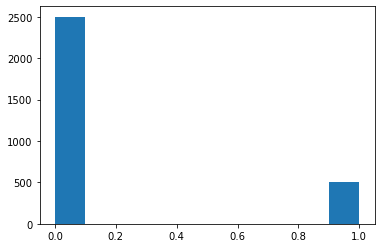

In [68]:
# визуализируйте результат: ваш код здесь
import matplotlib.pyplot as plt
plt.hist(data['label']);

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [69]:
from sklearn.feature_extraction.text import CountVectorizer

Замените все пустоты (пустые строки) в данных на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [70]:
#ищем строкис нулевой длиной (ну мао ли):
len_mask = data['email'].apply(lambda x: len(str(x)))
display('empty messages: ', (len_mask == 0).sum())
display('Nan messages: ', data['email'].isna().sum())
data = data.dropna()
display('after NaN removal: ', data)

'empty messages: '

0

'Nan messages: '

1

'after NaN removal: '

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0
...,...,...
2995,abc s good morning america ranks it the NUMBE...,1
2996,hyperlink hyperlink hyperlink let mortgage le...,1
2997,thank you for shopping with us gifts for all ...,1
2998,the famous ebay marketing e course learn to s...,1


Переводим данные в векторный вид:

In [71]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["email"])
X

<2999x34116 sparse matrix of type '<class 'numpy.int64'>'
	with 348376 stored elements in Compressed Sparse Row format>

Определите, сколько теперь признаков в нашем наборе данных:

In [72]:
#ваш код здесь
X.shape

(2999, 34116)

## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [73]:
#ваш код здесь
y = data['label']


Разделите выборку на обучающую и тестовую, размер тестовой выборки возьмите как 0.25, параметр random_state определите со значением 42:

In [74]:
#ваш код здесь
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [75]:
#ваш код здесь
y_test.mean()

0.16666666666666666

## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [84]:
#ваш код здесь
from sklearn.naive_bayes import ComplementNB
model = ComplementNB(alpha=0.01)
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test) # columns correspond to probabilities of belonging to class 0 and 1

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [112]:
from sklearn import metrics
print('accuracy on train: ', metrics.accuracy_score(y_train, y_pred_train))
print('accuracy on test: ', metrics.accuracy_score(y_test, y_pred))
print('precision on train: ', metrics.precision_score(y_train, y_pred_train))
print('precision on test: ', metrics.precision_score(y_test, y_pred))
print('recall on train: ', metrics.recall_score(y_train, y_pred_train))
print('recall on test: ', metrics.recall_score(y_test, y_pred))
print('f1 score on train: ', metrics.f1_score(y_train, y_pred_train))
print('f1 score on test: ', metrics.f1_score(y_test, y_pred))

accuracy on train:  0.9986660738105825
accuracy on test:  0.9893333333333333
precision on train:  1.0
precision on test:  0.9915966386554622
recall on train:  0.9919786096256684
recall on test:  0.944
f1 score on train:  0.9959731543624161
f1 score on test:  0.9672131147540983


Нарисуйте ROC-кривую:

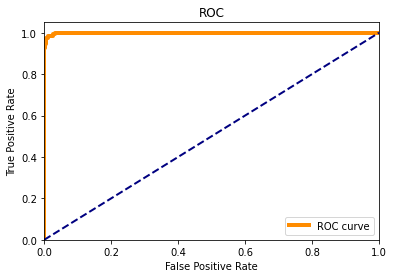

No Skill: ROC AUC=0.99924
Naive Bayes: ROC AUC=0.50000


In [91]:
#ваш код здесь
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:,1], drop_intermediate=False)
roc_auc = auc(fpr, tpr)

# Compute micro-average ROC curve and ROC area
#fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()

plt.plot(fpr, tpr, color="darkorange", lw=4,  label="ROC curve")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

print('No Skill: ROC AUC=%.5f' % (roc_auc))
print('Naive Bayes: ROC AUC=%.5f' % 0.5)

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [111]:
#ваш код здесь
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]}

grid_search = GridSearchCV(
    estimator=ComplementNB(), 
    param_grid=param_grid, 
    cv=5, 
    n_jobs = -1, #use all kernels available
    scoring='f1'
)
grid_search.fit(X_train, y_train) 

display(grid_search.cv_results_)

print("Наилучшие значения параметров: {}".format(grid_search.best_params_))

y_pred_train_gs = grid_search.predict(X_train)
y_pred_gs = grid_search.predict(X_test)
y_pred_proba_gs = grid_search.predict_proba(X_test)

print('f1 score on train: ', metrics.f1_score(y_train, y_pred_train_gs))
print('f1 score on test: ', metrics.f1_score(y_test, y_pred_gs))

fpr_gs, tpr_gs, _ = roc_curve(y_test, y_pred_proba_gs[:,1], drop_intermediate=False)
roc_auc_gs = auc(fpr_gs, tpr_gs)
print('ROC AUC=%.5f' % (roc_auc_gs))

print('Проанализируем зависимость качества классификации от параметра alpha.', 
      '\nТак как выборка несбалансированная, качество оценивалось по метрике F1. ',
'\nНабор значений alpha, использованный для тестирования: [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]. ',
'\nНа тренировочном наборе, на alpha = 3 и 10 значения метрики F1 значительно снижаются. ',
      '\n Однако, на значениях в диапазоне [0.01, 1] изменения F1 происходят в третьем знаке после запятой.',
      '\nЗначение ROC-AUC улучшилось в четвертом знаке после запятой, однако оно и так очень близко к 1:',
      '\n 0.99924 и 0.99950 до и после оптимизации, соответственно.')

{'mean_fit_time': array([0.02732949, 0.01870279, 0.03435912, 0.02750735, 0.02711987,
        0.02542148, 0.02857161, 0.01939368, 0.02565284, 0.01717973]),
 'std_fit_time': array([0.00408383, 0.00370547, 0.01896392, 0.00973818, 0.00416445,
        0.00508165, 0.00868938, 0.00387303, 0.00676249, 0.00466668]),
 'mean_score_time': array([0.00597477, 0.00906134, 0.01574583, 0.00974202, 0.01039181,
        0.0030169 , 0.00730171, 0.00799422, 0.00519242, 0.00169387]),
 'std_score_time': array([0.00449719, 0.0013129 , 0.00586812, 0.00442077, 0.005706  ,
        0.00251293, 0.00140462, 0.00505506, 0.00294447, 0.00338774]),
 'param_alpha': masked_array(data=[0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0},
  {'alpha': 0.001},
  {'alpha': 0.003},
  {'alpha': 0.01},
  {'alpha': 0.03},
  {'alpha': 0.1},
  {'alph

Наилучшие значения параметров: {'alpha': 0.03}
f1 score on train:  0.9959731543624161
f1 score on test:  0.9838709677419355
ROC AUC=0.99950
Проанализируем зависимость качества классификации от параметра alpha. 
Так как выборка несбалансированная, качество оценивалось по метрике F1.  
Набор значений alpha, использованный для тестирования: [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10].  
На тренировочном наборе, на alpha = 3 и 10 значения метрики F1 значительно снижаются.  
 Однако, на значениях в диапазоне [0.01, 1] изменения F1 происходят в третьем знаке после запятой. 
Значение ROC-AUC улучшилось в четвертом знаке после запятой, однако оно и так очень близко к 1: 
 0.99924 и 0.99950 до и после оптимизации, соответственно.
